In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline


# Preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler


# Models

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

# XAI Models

# explainability

import shap

# print the JS visualization code to the notebook

shap.initjs()

# Dataset

### Data Dictionary

* ID: Represents a unique identification of an entry
* Customer_ID: Represents a unique identification of a person
* Month: Represents the month of the year
* Name: Represents the name of a person
* Age: Represents the age of the person
* SSN: Represents the social security number of a person
* Occupation: Represents the occupation of the person
* Annual_Income: Represents the annual income of the person
* Monthly_Inhand_Salary: Represents the monthly base salary of a person
* Num_Bank_Accounts: Represents the number of bank accounts a person holds
* Num_Credit_Card: Represents the number of other credit cards held by a person
* Interest_Rate: Represents the interest rate on credit card
* Num_of_Loan: Represents the number of loans taken from the bank
* Type_of_Loan: Represents the types of loan taken by a person
* Delay_from_due_date: Represents the average number of days delayed from the payment date
* Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
* Changed_Credit_Limit: Represents the percentage change in credit card limit
* Num_Credit_Inquiries: Represents the number of credit card inquiries
* Credit_Mix: Represents the classification of the mix of credits
* Outstanding_Debt: Represents the remaining debt to be paid (in USD)
* Credit_Utilization_Ratio: Represents the utilization ratio of credit card
* Credit_History_Age: Represents the age of credit history of the person
* Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
* Total_EMI_per_month: Represents the monthly EMI payments (in USD)
* Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
* Payment_Behaviour: Represents the payment behavior of the customer (in USD)
* Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
* Credit_Score: The Outcome

In [ ]:
data_train = pd.read_csv("/content/Dissertation/train.csv")

data_train.shape

<ipython-input-3-16e45bba0795>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("/content/Dissertation/train.csv")


(100000, 28)

In [ ]:
data_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.60935,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.37786,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.79735,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


## Information about Dataset

In [ ]:
data_train["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
data_train["Month"].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [ ]:
data_train["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
pd.crosstab(data_train["Occupation"], data_train["Credit_Score"])

Credit_Score,Good,Poor,Standard
Occupation,,,
Accountant,1128,1879,3264
Architect,1144,1734,3477
Developer,1134,1792,3309
Doctor,1082,1661,3344
Engineer,1182,1932,3236
Entrepreneur,1080,1896,3198
Journalist,1173,1725,3187
Lawyer,1162,1810,3603
Manager,1098,1732,3143


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### Converting all numeric data to int64 or Float

In [ ]:
columns_int = ['Age', 'Num_of_Loan']

# data_train[columns_int] = data_train[columns_int].str.replace('_', '')

# Loop through each column and replace characters

for col in columns_int:
    data_train[col] = data_train[col].str.replace('_', '')

# Convert specified columns to integers
data_train[columns_int] = data_train[columns_int].astype(int)
data_train[columns_int] = data_train[columns_int].astype('int64')

In [ ]:
columns_float = ['Changed_Credit_Limit', 'Outstanding_Debt',
                 'Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 'Num_of_Delayed_Payment']

# Remove underscores from the specified columns
for col in columns_float:
    data_train[col] = data_train[col].str.replace('_', '')

# Replace empty strings with NaN
data_train[columns_float] = data_train[columns_float].replace('', np.nan)

# Convert specified columns to floats
data_train[columns_float] = data_train[columns_float].astype(float)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
data_train["Age"].value_counts()

38      2994
28      2968
31      2955
26      2945
32      2884
        ... 
1908       1
4583       1
7549       1
3119       1
1342       1
Name: Age, Length: 1728, dtype: int64

In [ ]:
pd.crosstab(data_train["Age"], data_train["Credit_Score"])

Credit_Score,Good,Poor,Standard
Age,,,
-500,175,253,458
14,26,571,578
15,73,670,831
16,45,643,767
17,59,681,762
...,...,...,...
8674,0,0,1
8678,0,0,1
8682,0,0,1


# Data Cleaning

In [ ]:
data_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

* ID, SSN, Name, CustomerID will not contribute to the credit score, and are unique to each data point. Let's drop these columns
* Occupation, TypeofLoan need to be dropped owing to the number of missing values
* The rest of the features contribute to the credit score according to this domain. So, rather than dropping the feature, lets remove the datapoints that have null values

In [ ]:
data_train = data_train.drop(['ID', 'SSN', 'Name', 'Customer_ID', 'Type_of_Loan', 'Occupation', 'Month'], axis = 1)

In [ ]:
data_train = data_train.dropna()

data_train.isnull().sum()

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64050.0,1.121217e+02,6.921277e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.698000e+03
Annual_Income,64050.0,1.763488e+05,1.435948e+06,7.005930e+03,19329.415000,36898.380000,72125.200000,2.419806e+07
Monthly_Inhand_Salary,64050.0,4.153026e+03,3.169859e+03,3.036450e+02,1619.187000,3050.207000,5909.097000,1.520463e+04
Num_Bank_Accounts,64050.0,1.682885e+01,1.159202e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,64050.0,2.274618e+01,1.297584e+02,0.000000e+00,4.000000,6.000000,7.000000,1.499000e+03
Interest_Rate,64050.0,7.356871e+01,4.720593e+02,1.000000e+00,8.000000,14.000000,20.000000,5.797000e+03
Num_of_Loan,64050.0,2.938314e+00,6.202418e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.485000e+03
Delay_from_due_date,64050.0,2.108036e+01,1.487002e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,64050.0,3.095578e+01,2.257401e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,64050.0,1.041314e+01,6.790396e+00,-6.480000e+00,5.350000,9.420000,14.960000,3.697000e+01


# Data Preprocessing

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64050 entries, 0 to 98303
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       64050 non-null  int64  
 1   Annual_Income             64050 non-null  float64
 2   Monthly_Inhand_Salary     64050 non-null  float64
 3   Num_Bank_Accounts         64050 non-null  int64  
 4   Num_Credit_Card           64050 non-null  int64  
 5   Interest_Rate             64050 non-null  int64  
 6   Num_of_Loan               64050 non-null  int64  
 7   Delay_from_due_date       64050 non-null  int64  
 8   Num_of_Delayed_Payment    64050 non-null  float64
 9   Changed_Credit_Limit      64050 non-null  float64
 10  Num_Credit_Inquiries      64050 non-null  float64
 11  Credit_Mix                64050 non-null  object 
 12  Outstanding_Debt          64050 non-null  float64
 13  Credit_Utilization_Ratio  64050 non-null  float64
 14  Credit

### Handling Categorical Data

In [ ]:
Categorical_features = ['Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

data_train[Categorical_features]

,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
6,Good,22 Years and 7 Months,No,Low_spent_Small_value_payments,Good
8,Good,26 Years and 7 Months,No,Low_spent_Small_value_payments,Standard
9,Good,26 Years and 8 Months,No,High_spent_Large_value_payments,Good
10,_,26 Years and 9 Months,No,High_spent_Large_value_payments,Standard
...,...,...,...,...,...
98296,_,24 Years and 11 Months,No,Low_spent_Small_value_payments,Standard
98298,_,25 Years and 1 Months,No,Low_spent_Small_value_payments,Standard
98299,Good,25 Years and 2 Months,NM,Low_spent_Small_value_payments,Standard
98300,Good,25 Years and 3 Months,No,High_spent_Large_value_payments,Standard


In [ ]:
data_train["Credit_Mix"].value_counts()

Standard    23444
Good        15525
_           12967
Bad         12114
Name: Credit_Mix, dtype: int64

In [ ]:
data_train["Credit_Score"].value_counts()

Standard    34139
Poor        18587
Good        11324
Name: Credit_Score, dtype: int64

In [ ]:
data_train["Payment_of_Min_Amount"].value_counts()

Yes    33644
No     22782
NM      7624
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
data_train["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      16124
High_spent_Medium_value_payments    11384
High_spent_Large_value_payments      8914
Low_spent_Medium_value_payments      8819
High_spent_Small_value_payments      7367
Low_spent_Large_value_payments       6662
!@9#%8                               4780
Name: Payment_Behaviour, dtype: int64

* CreditMix' : Lets use label encoding to this, as there is a inherent relationship between the values
* CreditHistoryAge' : Let's replace with the total number of months
* PaymentofMinAmount' : Let's use one hot encoding as there is no inherent relationship
* PaymentBehaviour' : Let's use one hot encoding as there is no inherent relationship
* CreditScore' : Lets use label encoding to this, as there is a inherent relationship between the values

### Label Encoding for the Credit Score

In [ ]:
le_Cs = LabelEncoder()

data_train['Credit_Score'] = le_Cs.fit_transform(data_train['Credit_Score'])

le_Cs.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

### One-Hot Encoding for 'PaymentofMinAmount'

In [ ]:
# Instantiate OneHotEncoder without specifying the 'sparse' parameter

encoder = OneHotEncoder(drop='first', sparse_output=False)

# Reshape the input data

encoded_data = encoder.fit_transform(data_train['Payment_of_Min_Amount'].values.reshape(-1, 1))

In [ ]:
encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Payment_of_Min_Amount']))

data_train = data_train.reset_index(drop=True) # Resetting the index to avoid issues while concatenating

data_train= pd.concat([data_train, encoded_data_train], axis=1)

### 'CreditHistoryAge' : Let's replace with the total number of months

In [ ]:
data_copy = data_train

In [ ]:
def getMonths(duration):
    years, months = int(duration.split()[0]), int(duration.split()[3])
    months += years * 12
    return months

data_copy['Credit_History_Age'] = data_copy['Credit_History_Age'].apply(getMonths)

#### Credit_Mix : Lets use label encoding to this, as there is a inherent relationship between the values

In [ ]:
le_Cm = LabelEncoder()
data_copy['Credit_Mix'] = le_Cm.fit_transform(data_copy['Credit_Mix'])

le_Cm.classes_

array(['Bad', 'Good', 'Standard', '_'], dtype=object)

#### Payment_Behaviour : Let's use one hot encoding as there is no inherent relationship

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_data = encoder.fit_transform(data_copy['Payment_Behaviour'].values.reshape(-1, 1))

encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Payment_Behaviour']))

data_train = data_copy.reset_index(drop=True) # Resetting the index to avoid issues while concatenating

data_train= pd.concat([data_train, encoded_data_train], axis=1)

In [ ]:
data_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,1824.843,3,4,3,4,3,7.0,11.27,...,312.494089,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,23,19114.12,1824.843,3,4,3,4,3,8.0,11.27,...,244.565317,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28,34847.84,3037.987,2,4,6,1,3,4.0,5.42,...,470.690627,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,28,34847.84,3037.987,2,4,6,1,7,1.0,7.42,...,484.591214,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28,34847.84,3037.987,2,1385,6,1,3,-1.0,5.42,...,466.466476,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_train["Credit_Mix"].value_counts()

2    23444
1    15525
3    12967
0    12114
Name: Credit_Mix, dtype: int64

In [ ]:
data_train["Credit_Score"].value_counts()

2    34139
1    18587
0    11324
Name: Credit_Score, dtype: int64

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64050 entries, 0 to 64049
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 64050 non-null  int64  
 1   Annual_Income                                       64050 non-null  float64
 2   Monthly_Inhand_Salary                               64050 non-null  float64
 3   Num_Bank_Accounts                                   64050 non-null  int64  
 4   Num_Credit_Card                                     64050 non-null  int64  
 5   Interest_Rate                                       64050 non-null  int64  
 6   Num_of_Loan                                         64050 non-null  int64  
 7   Delay_from_due_date                                 64050 non-null  int64  
 8   Num_of_Delayed_Payment                              64050 non-null  float64


#### Dropping the left over categorical values post one hot encoding

In [ ]:
data_train = data_train.drop(['Payment_of_Min_Amount', 'Payment_Behaviour'], axis = 1)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64050 entries, 0 to 64049
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 64050 non-null  int64  
 1   Annual_Income                                       64050 non-null  float64
 2   Monthly_Inhand_Salary                               64050 non-null  float64
 3   Num_Bank_Accounts                                   64050 non-null  int64  
 4   Num_Credit_Card                                     64050 non-null  int64  
 5   Interest_Rate                                       64050 non-null  int64  
 6   Num_of_Loan                                         64050 non-null  int64  
 7   Delay_from_due_date                                 64050 non-null  int64  
 8   Num_of_Delayed_Payment                              64050 non-null  float64


## Data Balancing

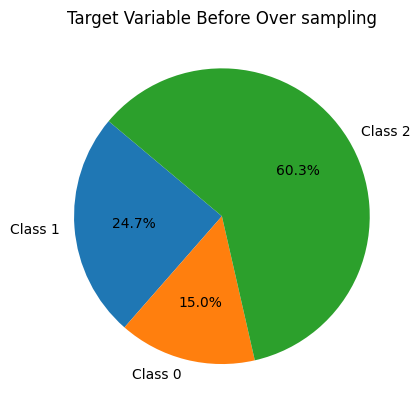

In [ ]:
arr_0, arr_1, arr_2 = [], [], []
for i in data_train['Credit_Score']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)

Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable Before Over sampling')
plt.show()

#### Dataset is imbalanced. Let's use oversampling to increase the number of datapoints with the classes 0 and 1

In [ ]:
# Class_2 represents the size of the majority class

Class_2 = len(data_train[data_train['Credit_Score'] == 2])

# Splitting the dataset based on 'Credit_Score'

data_class_1 = data_train[data_train['Credit_Score'] == 1]
data_class_2 = data_train[data_train['Credit_Score'] == 2]
data_class_0 = data_train[data_train['Credit_Score'] == 0]

# Oversampling the minority classes

data_class_1_oversampled = data_class_1.sample(n=Class_2, replace=True)
data_class_0_oversampled = data_class_0.sample(n=Class_2, replace=True)

# Concatenating the oversampled data with the majority class

data_oversampled = pd.concat([data_class_2, data_class_1_oversampled, data_class_0_oversampled], axis=0)

# Optional: Shuffle the oversampled data

data_oversampled = data_oversampled.sample(frac=1).reset_index(drop=True)

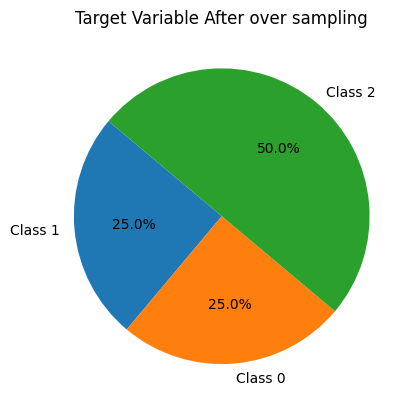

In [ ]:
arr_0, arr_1, arr_2 = [], [], []
for i in data_oversampled['Credit_Score']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)

Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable After over sampling')
plt.show()

## Feature Analysis

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

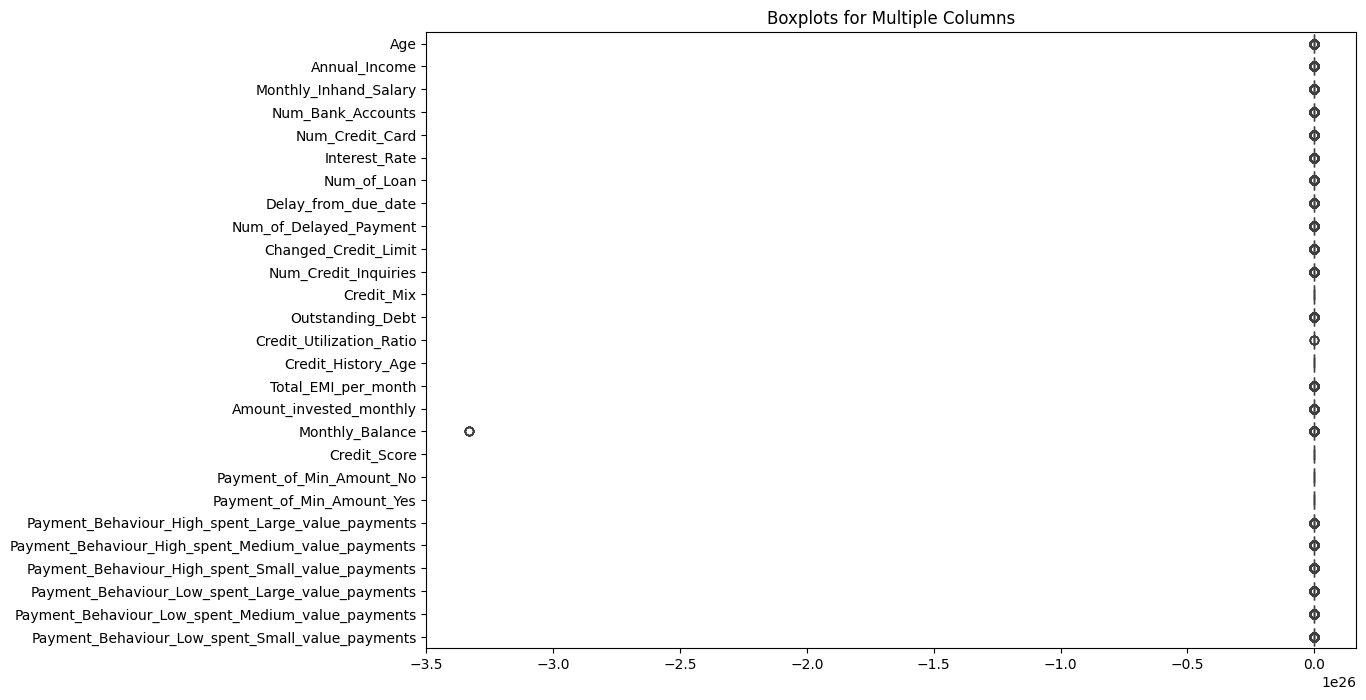

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df

sns.boxplot(data=data_oversampled, orient='h')  # orient='h' for horizontal boxplots

plt.title('Boxplots for Multiple Columns')

##### There is an outlier in the MonthlyBalance that is effecting this plot. Before we handle it, lets check the skewness of the feature distributions

In [ ]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102417 entries, 0 to 102416
Data columns (total 27 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 102417 non-null  int64  
 1   Annual_Income                                       102417 non-null  float64
 2   Monthly_Inhand_Salary                               102417 non-null  float64
 3   Num_Bank_Accounts                                   102417 non-null  int64  
 4   Num_Credit_Card                                     102417 non-null  int64  
 5   Interest_Rate                                       102417 non-null  int64  
 6   Num_of_Loan                                         102417 non-null  int64  
 7   Delay_from_due_date                                 102417 non-null  int64  
 8   Num_of_Delayed_Payment                              102417 non-n

### Outlier Removal

In [ ]:
df = data_oversampled.drop('Credit_Score', axis = 1)

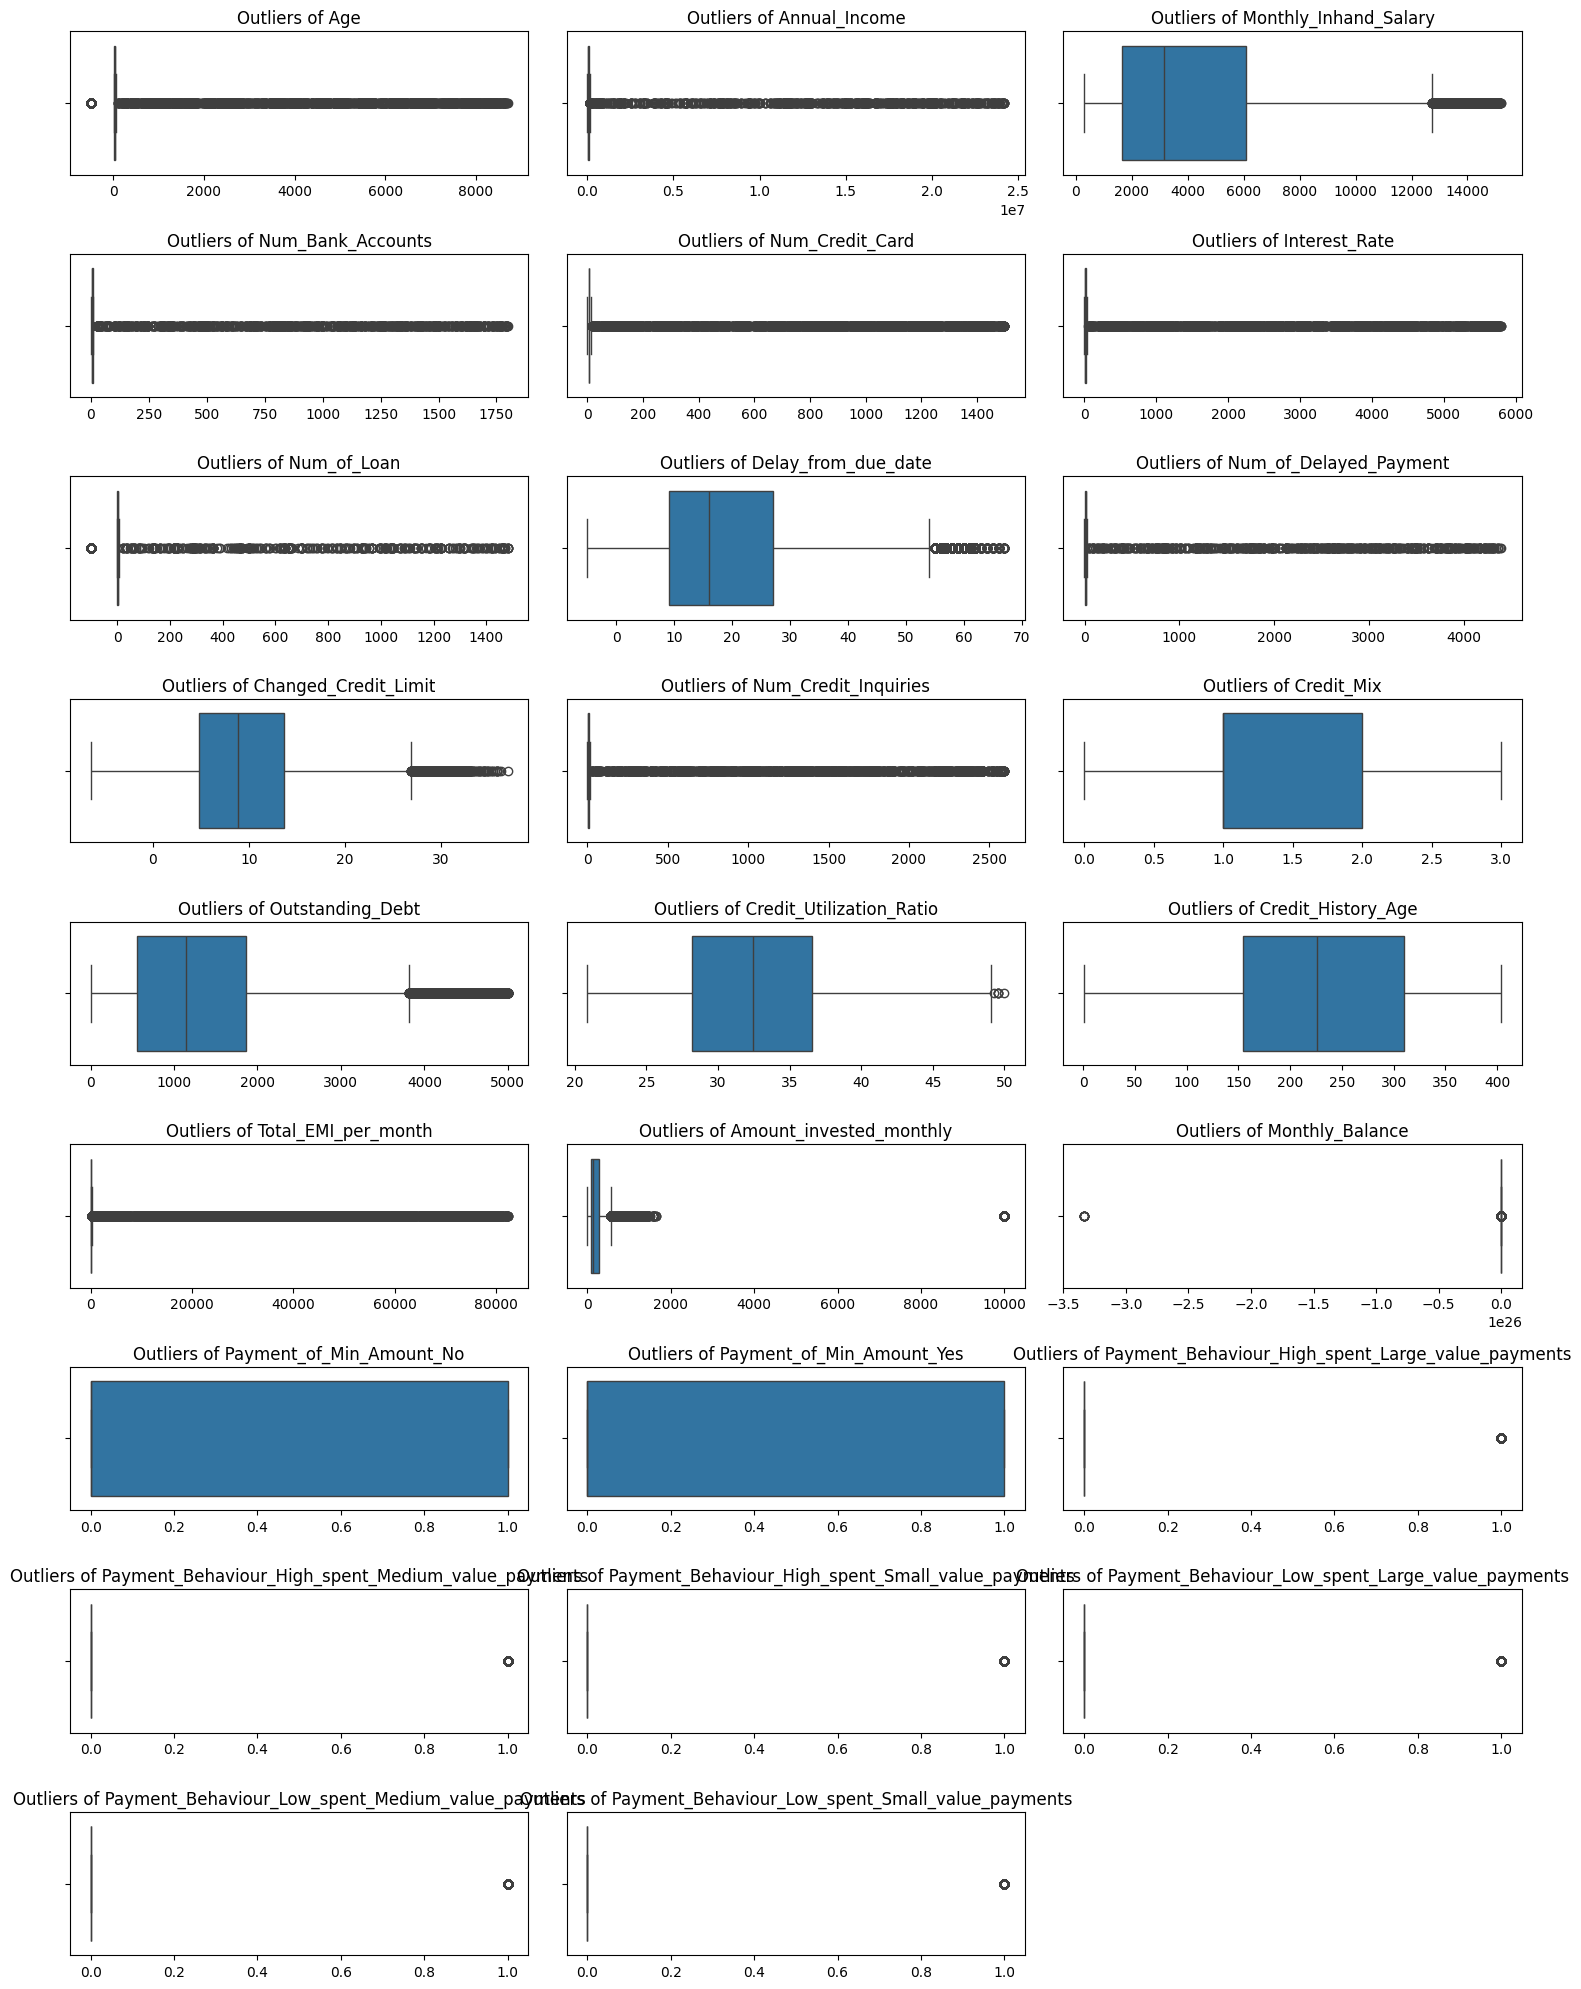

In [ ]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes

axes = axes.ravel()

i = -1
for feature in df.columns:
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Outliers of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#####  Adding back the target column after plotting

In [ ]:
df['Credit_Score'] = data_oversampled['Credit_Score']

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# print(IQR)

print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

          Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       False          False                  False              False   
1       False          False                  False              False   
2       False          False                  False              False   
3       False          False                  False              False   
4       False          False                  False              False   
...       ...            ...                    ...                ...   
102412  False          False                  False              False   
102413  False          False                  False              False   
102414  False          False                  False              False   
102415  False          False                  False              False   
102416  False          False                  False              False   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                 False          Fa

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

          Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       False          False                  False              False   
1       False          False                  False              False   
2       False          False                  False              False   
3       False          False                  False              False   
4       False          False                  False              False   
...       ...            ...                    ...                ...   
102412  False          False                  False              False   
102413  False          False                  False              False   
102414  False          False                  False              False   
102415  False          False                  False              False   
102416  False          False                  False              False   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                 False          Fa

In [ ]:
s = set([
    'Payment_of_Min_Amount_No',
    'Payment_of_Min_Amount_Yes',
    'Payment_Behaviour_High_spent_Large_value_payments',
    'Payment_Behaviour_High_spent_Medium_value_payments',
    'Payment_Behaviour_High_spent_Small_value_payments',
    'Payment_Behaviour_Low_spent_Large_value_payments',
    'Payment_Behaviour_Low_spent_Medium_value_payments',
    'Payment_Behaviour_Low_spent_Small_value_payments',
    'Age',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Num_Credit_Inquiries'
])

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in df.columns:
    if column in s:
        continue
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

print(df)

        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0        24       10358.88               1015.240                  7   
1        29        9069.98                546.832                  7   
2        26       13065.87               1359.823                  5   
4        21       29180.37               2409.698                  4   
6        44       63354.36               5421.530                  6   
...     ...            ...                    ...                ...   
102412   25       31937.62               2394.468                  5   
102413   14       50757.15               4162.763                 10   
102414  711       67644.92               5465.077                  4   
102415   41        9269.99                598.499                  3   
102416   18       18246.25               1410.521                  4   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                     7             18            6        

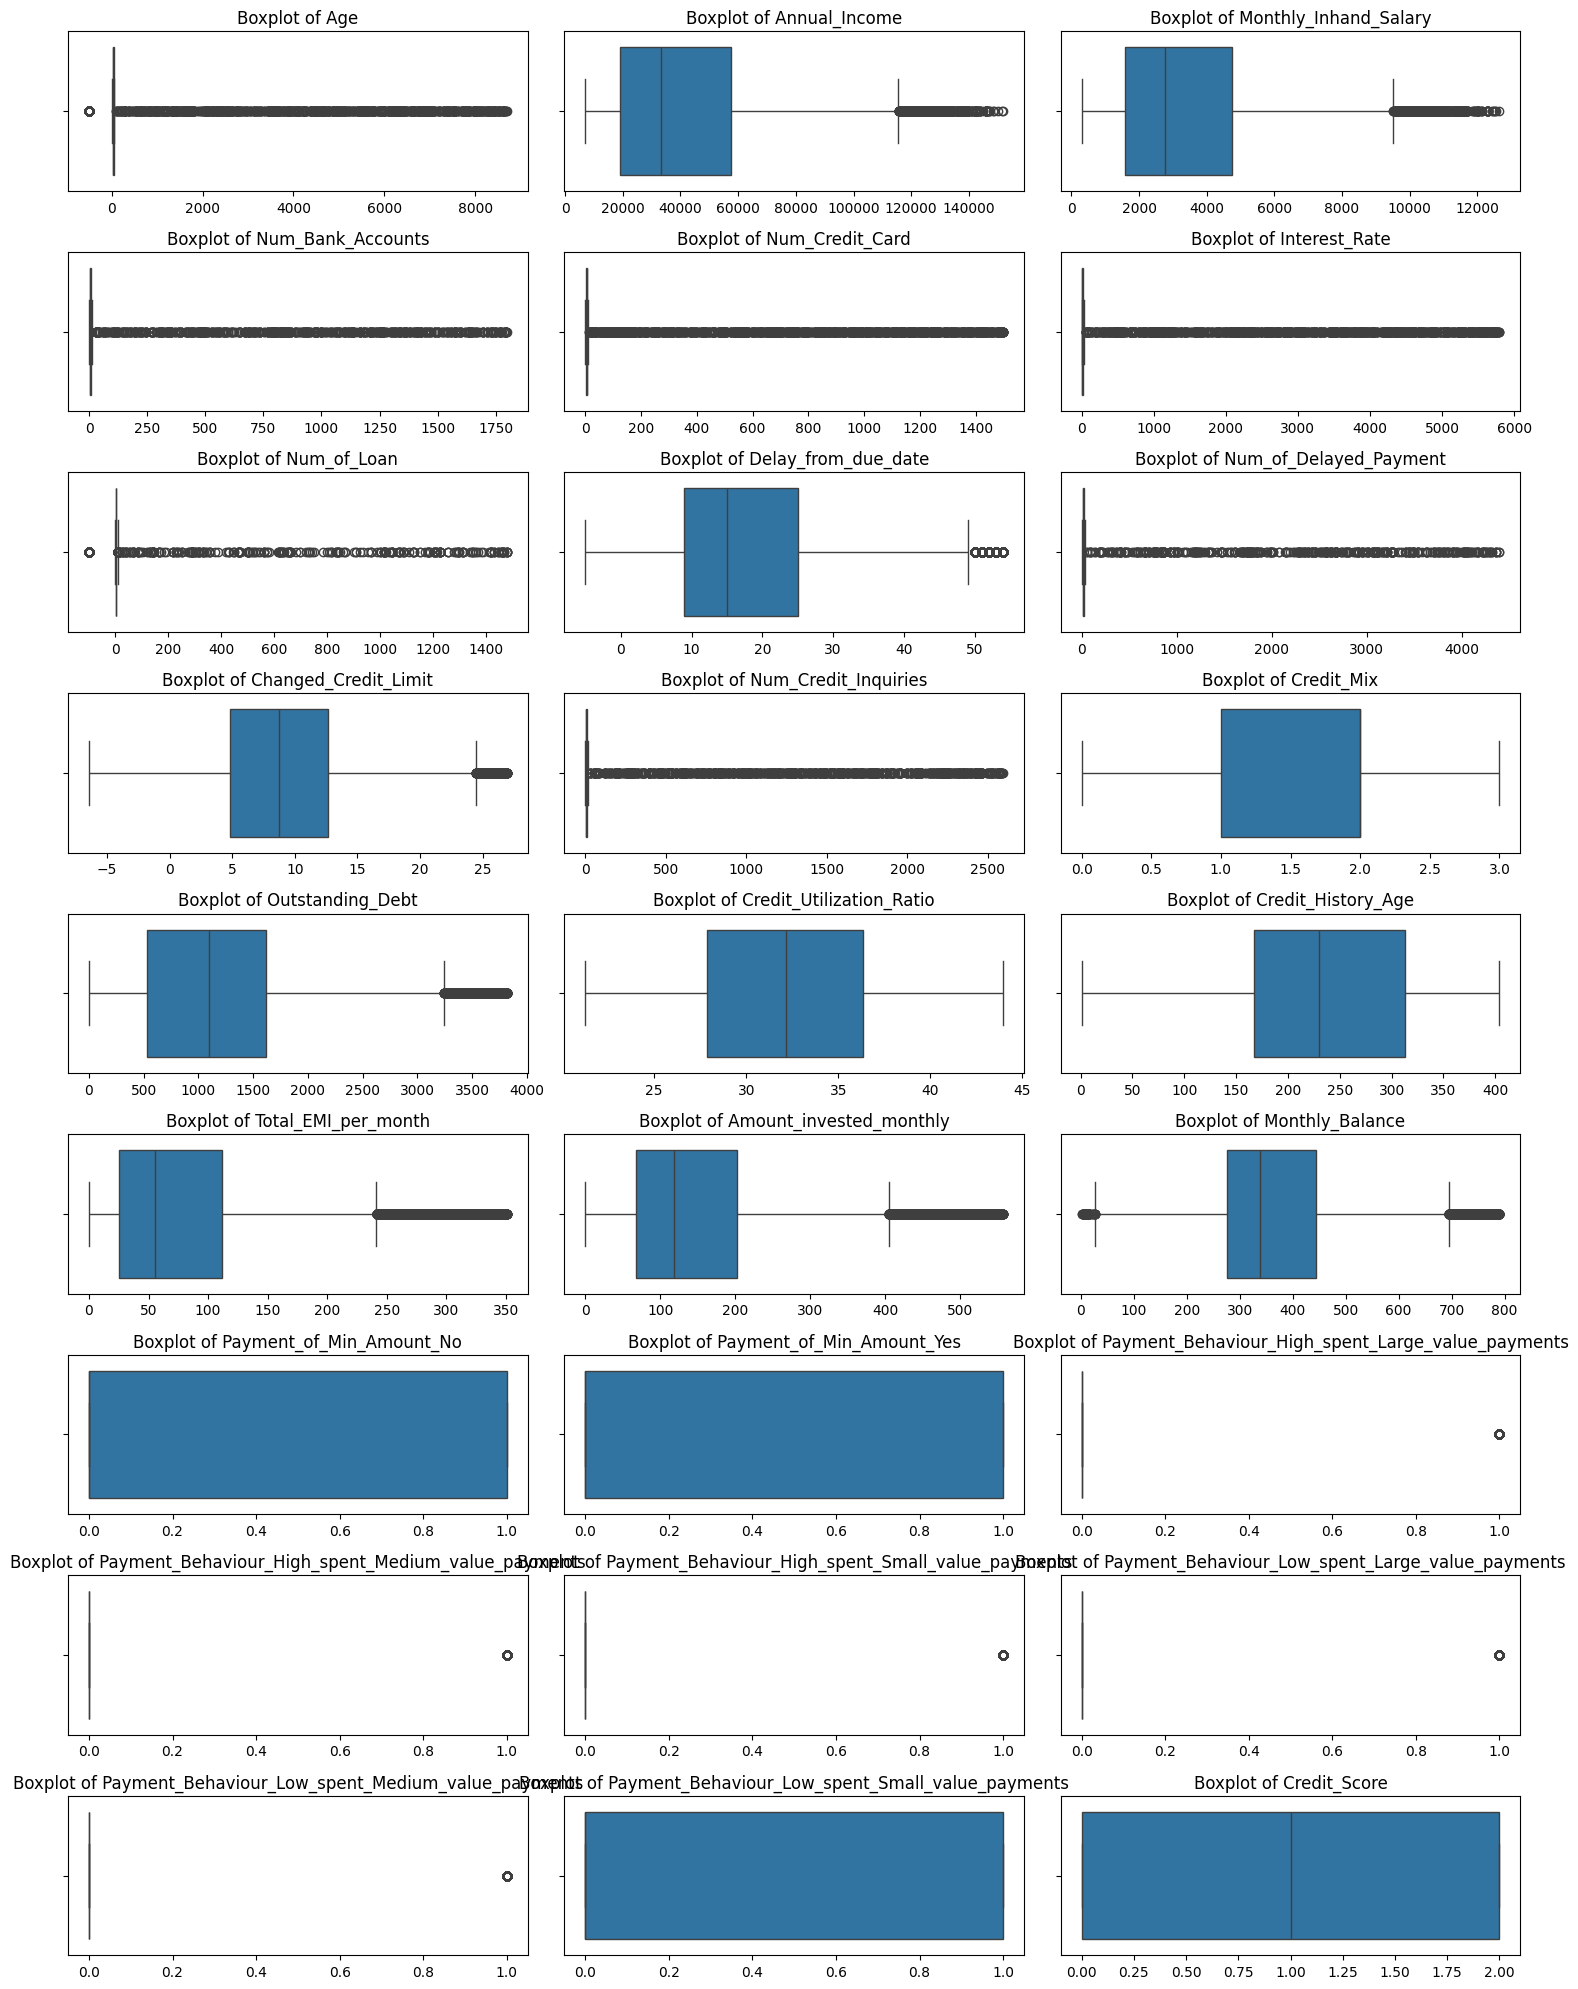

In [ ]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes

axes = axes.ravel()

i = -1

for feature in df.columns:

    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
df.reset_index(drop=True)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Monthly_Balance,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score
0,24,10358.88,1015.240,7,7,18,6,45,19.0,16.03,...,284.970227,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,29,9069.98,546.832,7,9,31,6,16,19.0,1.15,...,254.733263,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,26,13065.87,1359.823,5,6,13,-100,16,2882.0,1.72,...,230.852402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,21,29180.37,2409.698,4,4,4,2,30,19.0,4.14,...,363.574942,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,44,63354.36,5421.530,6,6,10,1,21,13.0,15.20,...,393.631778,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69672,25,31937.62,2394.468,5,3,15,2,12,11.0,17.37,...,280.604111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
69673,14,50757.15,4162.763,10,7,20,5,27,19.0,20.78,...,413.512490,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
69674,711,67644.92,5465.077,4,9,22,2,23,18.0,14.03,...,522.442364,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
69675,41,9269.99,598.499,3,6,24,2,16,19.0,7.24,...,312.281072,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Text(0.5, 1.0, 'Boxplots for Multiple Columns')

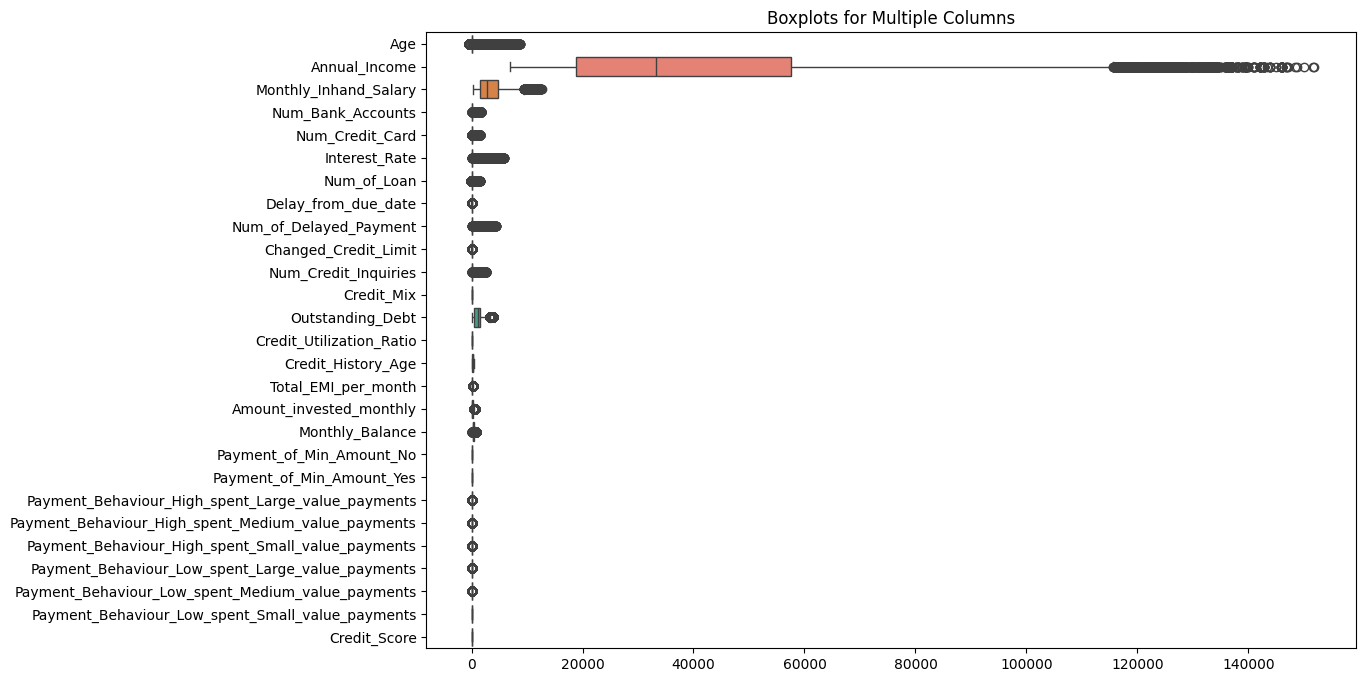

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df

sns.boxplot(data=df, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

## Feature Scaling

* Scaling post outlier removal

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

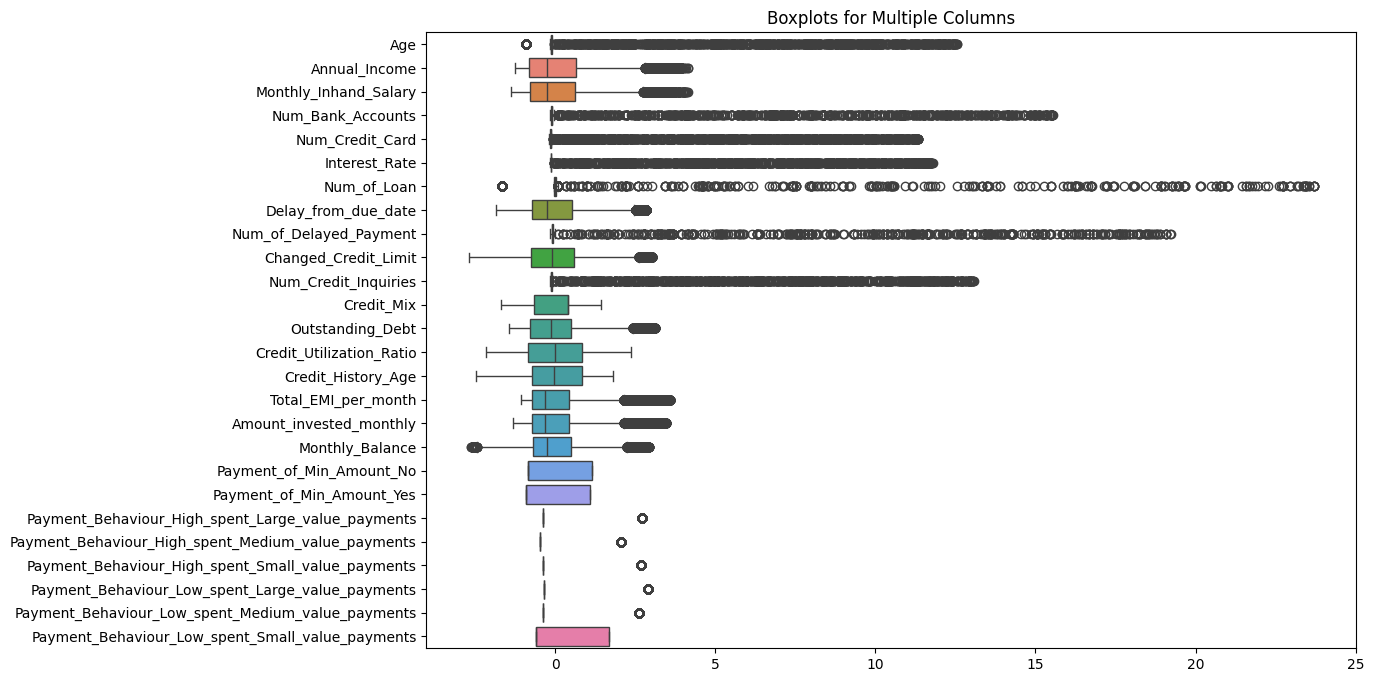

In [ ]:
df_without_outliers  = df.copy()

sc = StandardScaler()
sc.fit(df_without_outliers.drop('Credit_Score', axis = 1))
data_oversampled_normalized_without_outliers = sc.transform(df_without_outliers.drop('Credit_Score', axis = 1))
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns = df_without_outliers.drop('Credit_Score', axis = 1).columns)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df

sns.boxplot(data=data_oversampled_normalized_without_outliers, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

In [ ]:
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers,
                                                            columns=df_without_outliers.columns.difference(['Credit_Score']))


data_oversampled_normalized_without_outliers['Credit_Score'] = df_without_outliers.reset_index()['Credit_Score']

data_oversampled_normalized_without_outliers

,Age,Amount_invested_monthly,Annual_Income,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Credit_Utilization_Ratio,Delay_from_due_date,Interest_Rate,Monthly_Balance,...,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Total_EMI_per_month,Credit_Score
0,-0.128342,-0.680663,-1.117906,1.167179,-1.065492,-1.690115,-1.066917,2.134441,-0.117789,-0.628240,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,1.675369,-0.855802,1.088980,-0.620680,1
1,-0.121027,-0.810827,-1.166016,-1.389695,-1.213957,-1.690115,-1.109627,-0.174801,-0.090982,-0.840631,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,1.675369,-0.855802,1.088980,-0.640004,2
2,-0.125416,0.225150,-1.016865,-1.291750,0.281295,0.396849,-0.231116,-0.174801,-0.128099,-1.008375,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,1.675369,1.168495,-0.918291,-0.843970,2
3,-0.132731,-0.595207,-0.415377,-0.875914,1.415991,-0.646633,-1.697469,0.940006,-0.146657,-0.076104,...,-0.36761,2.072343,-0.370572,-0.344709,-0.380721,-0.596883,1.168495,-0.918291,-0.476136,0
4,-0.099083,2.131809,0.860199,1.024558,-0.354982,0.396849,0.108904,0.223345,-0.134285,0.135021,...,-0.36761,-0.482546,-0.370572,-0.344709,2.626593,-0.596883,-0.855802,1.088980,-0.691234,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69672,-0.126879,0.520443,-0.312460,1.397436,-1.224562,0.396849,-1.549467,-0.493317,-0.123975,-0.658909,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,1.675369,-0.855802,1.088980,-0.587294,1
69673,-0.142972,-0.336554,0.389997,1.983386,-1.553305,-1.690115,-0.193938,0.701119,-0.113665,0.274668,...,-0.36761,-0.482546,2.698530,-0.344709,-0.380721,-0.596883,-0.855802,1.088980,0.920268,2
69674,0.876732,0.158034,1.020348,0.823514,-1.436654,0.396849,0.344848,0.382603,-0.109540,1.039814,...,-0.36761,2.072343,-0.370572,-0.344709,-0.380721,-0.596883,-0.855802,1.088980,0.306715,1
69675,-0.103472,-1.081358,-1.158550,-0.343232,-0.927632,0.396849,-0.111835,-0.174801,-0.105416,-0.436403,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,-0.596883,-0.855802,1.088980,-0.917235,1


In [ ]:
df2 = data_oversampled_normalized_without_outliers.copy()

df2

,Age,Amount_invested_monthly,Annual_Income,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Credit_Utilization_Ratio,Delay_from_due_date,Interest_Rate,Monthly_Balance,...,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Total_EMI_per_month,Credit_Score
0,-0.128342,-0.680663,-1.117906,1.167179,-1.065492,-1.690115,-1.066917,2.134441,-0.117789,-0.628240,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,1.675369,-0.855802,1.088980,-0.620680,1
1,-0.121027,-0.810827,-1.166016,-1.389695,-1.213957,-1.690115,-1.109627,-0.174801,-0.090982,-0.840631,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,1.675369,-0.855802,1.088980,-0.640004,2
2,-0.125416,0.225150,-1.016865,-1.291750,0.281295,0.396849,-0.231116,-0.174801,-0.128099,-1.008375,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,1.675369,1.168495,-0.918291,-0.843970,2
3,-0.132731,-0.595207,-0.415377,-0.875914,1.415991,-0.646633,-1.697469,0.940006,-0.146657,-0.076104,...,-0.36761,2.072343,-0.370572,-0.344709,-0.380721,-0.596883,1.168495,-0.918291,-0.476136,0
4,-0.099083,2.131809,0.860199,1.024558,-0.354982,0.396849,0.108904,0.223345,-0.134285,0.135021,...,-0.36761,-0.482546,-0.370572,-0.344709,2.626593,-0.596883,-0.855802,1.088980,-0.691234,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69672,-0.126879,0.520443,-0.312460,1.397436,-1.224562,0.396849,-1.549467,-0.493317,-0.123975,-0.658909,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,1.675369,-0.855802,1.088980,-0.587294,1
69673,-0.142972,-0.336554,0.389997,1.983386,-1.553305,-1.690115,-0.193938,0.701119,-0.113665,0.274668,...,-0.36761,-0.482546,2.698530,-0.344709,-0.380721,-0.596883,-0.855802,1.088980,0.920268,2
69674,0.876732,0.158034,1.020348,0.823514,-1.436654,0.396849,0.344848,0.382603,-0.109540,1.039814,...,-0.36761,2.072343,-0.370572,-0.344709,-0.380721,-0.596883,-0.855802,1.088980,0.306715,1
69675,-0.103472,-1.081358,-1.158550,-0.343232,-0.927632,0.396849,-0.111835,-0.174801,-0.105416,-0.436403,...,-0.36761,-0.482546,-0.370572,-0.344709,-0.380721,-0.596883,-0.855802,1.088980,-0.917235,1


# Model Building

## 1. Decision Trees

In [ ]:
X = df2.drop('Credit_Score', axis=1)
y = df2['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# setup random seed

np.random.seed(42)

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred_decision = decision_tree_model.predict(X_test)

In [ ]:
decision_tree_model.score(X_test, y_test)

0.8786595866819747

In [ ]:

accuracy_decision = accuracy_score(y_test, y_pred_decision)

print(f'Accuracy: {accuracy_decision:.2f}')
print(classification_report(y_test, y_pred_decision))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4623
           1       0.86      0.93      0.89      4530
           2       0.90      0.74      0.81      4783

    accuracy                           0.88     13936
   macro avg       0.88      0.88      0.88     13936
weighted avg       0.88      0.88      0.88     13936



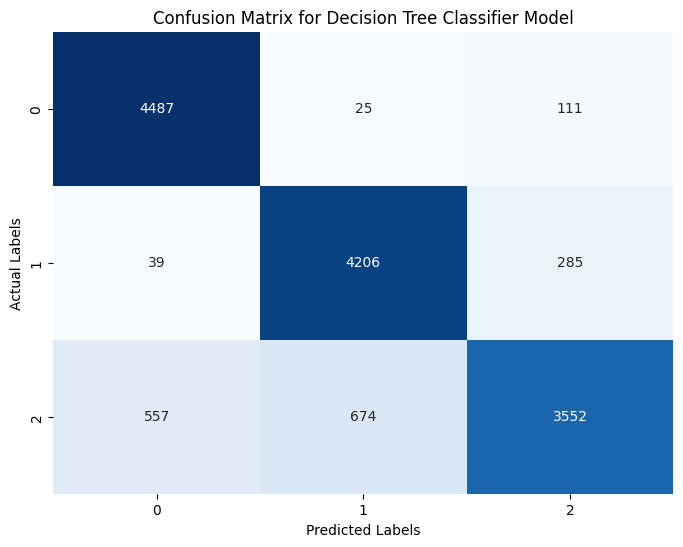

In [ ]:
de_confusion = confusion_matrix(y_test, y_pred_decision)

plt.figure(figsize=(8, 6))
sns.heatmap(de_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Decision Tree Classifier Model')

plt.show()

## XGBoost

In [ ]:
# setup random seed

np.random.seed(42)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f'Accuracy: {accuracy_xgb:.2f}')
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4623
           1       0.86      0.87      0.86      4530
           2       0.83      0.72      0.77      4783

    accuracy                           0.84     13936
   macro avg       0.84      0.84      0.84     13936
weighted avg       0.84      0.84      0.84     13936



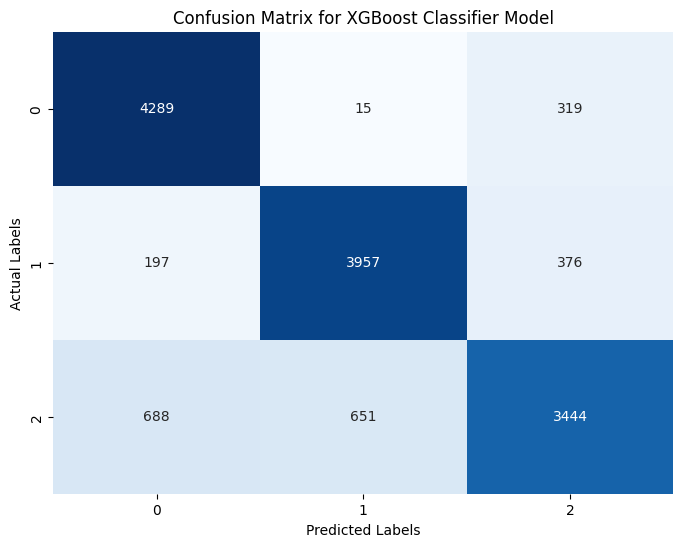

In [ ]:
xgb_confusion = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(xgb_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for XGBoost Classifier Model')
plt.show()

## 3. Random Forest

In [ ]:
# setup random seed

np.random.seed(42)

# Instantiate Random Forest Classifier

rdf_model = RandomForestClassifier(n_estimators=100)

# Fit the model to the data

rdf_model.fit(X_train, y_train)

y_preds_rdf = rdf_model.predict(X_test)

In [ ]:
accuracy_rdf = accuracy_score(y_test, y_preds_rdf)

print(f'Accuracy: {accuracy_rdf:.2f}')
print(classification_report(y_test, y_preds_rdf))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4623
           1       0.88      0.96      0.92      4530
           2       0.95      0.78      0.86      4783

    accuracy                           0.91     13936
   macro avg       0.91      0.91      0.90     13936
weighted avg       0.91      0.91      0.90     13936



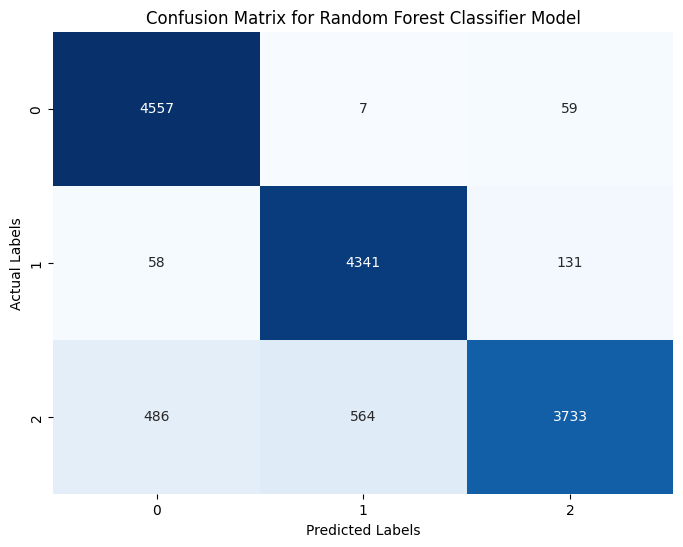

In [ ]:
rdf_confusion = confusion_matrix(y_test, y_preds_rdf)

plt.figure(figsize=(8, 6))
sns.heatmap(rdf_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest Classifier Model')

plt.show()

## Baseline model comparison

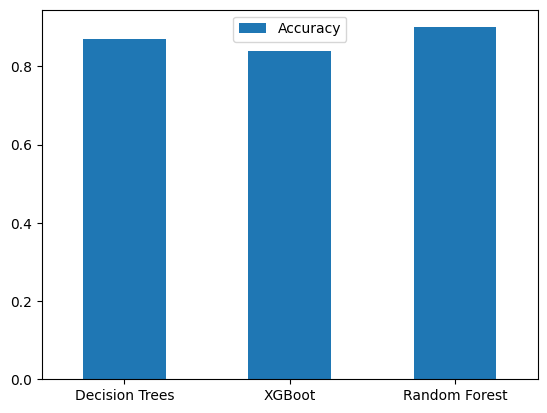

In [ ]:
model_scores = {"Decision Trees": 0.87,
                 "XGBoot": 0.84,
                 "Random Forest": 0.90}

model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

model_compare.T.plot.bar()
plt.xticks(rotation = 0);

# Hyperparameter Tuning with GridSearchCV

we're going to tune:

* Decision Tree
* XGBoost
* Random Forest Classifier

...GridSearchCV

In [ ]:
# Hyperparameter grid for Random Forest

rf_grid = {
    "n_estimators": np.arange(10, 100, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Hyperparameter grid for Decision Tree (similar to Random Forest without n_estimators)

dt_grid = {
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Hyperparameter grid for XGBoost (a popular gradient boosting library)

xgb_grid = {
    "n_estimators": np.arange(10, 100, 50),
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

"""
# Printing the hyperparameter grids
print("Random Forest Grid:")
print(rf_grid)
print("\nDecision Tree Grid:")
print(dt_grid)
print("\nXGBoost Grid:")
print(xgb_grid)

"""

'\n# Printing the hyperparameter grids\nprint("Random Forest Grid:")\nprint(rf_grid)\nprint("\nDecision Tree Grid:")\nprint(dt_grid)\nprint("\nXGBoost Grid:")\nprint(xgb_grid)\n\n'

## Grid Search on Decision Tree

In [ ]:
# Setup grid hyperparameter search for DT

de_rscv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                         param_distributions=dt_grid,
                         cv=5, n_iter=100, verbose=True)


# Fit random hyperparameter search model for Decision Tree

de_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   verbose=True)

In [ ]:
de_rscv.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

In [ ]:
y_preds_de_rscv = de_rscv.predict(X_test)

accuracy_de_rscv = accuracy_score(y_test, y_preds_de_rscv)

print(f'Accuracy: {accuracy_de_rscv:.2f}')
print(classification_report(y_test, y_preds_de_rscv))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4623
           1       0.86      0.93      0.89      4530
           2       0.90      0.74      0.81      4783

    accuracy                           0.88     13936
   macro avg       0.88      0.88      0.88     13936
weighted avg       0.88      0.88      0.88     13936



## Grid Search on XGBoost

In [ ]:
# Setup grid hyperparameter search for XGBoost

xgb_rscv = RandomizedSearchCV(xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
                         param_distributions=xgb_grid,
                         cv=5, n_iter=50, verbose=True)


# Fit random hyperparameter search model for XGBoost

xgb_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=3, num_parallel_tree=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': array([10, 60]),
                                        'subsample': [0.5, 0.7, 1.0]},
                   verbose=True)

In [ ]:
xgb_rscv.best_params_

{'subsample': 1.0,
 'n_estimators': 60,
 'min_child_weight': 3,
 'max_depth': 7,
 'learning_rate': 0.3,
 'colsample_bytree': 1.0}

In [ ]:
y_preds_xgb_rscv = xgb_rscv.predict(X_test)

accuracy_xgb_rscv = accuracy_score(y_test, y_preds_xgb_rscv)

print(f'Accuracy: {accuracy_xgb_rscv:.2f}')
print(classification_report(y_test, y_preds_xgb_rscv))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4623
           1       0.85      0.87      0.86      4530
           2       0.83      0.71      0.77      4783

    accuracy                           0.83     13936
   macro avg       0.83      0.84      0.83     13936
weighted avg       0.83      0.83      0.83     13936



## Grid Search on Random Forest

In [ ]:
# setup random seed

np.random.seed(42)

# Setup grid hyperparameter search for Random Forest

rf_rscv = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                         param_distributions=rf_grid,
                         cv=5, n_iter=100, verbose=True)


# Fit random hyperparameter search model for Random Forest

rf_rscv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [ ]:
rf_rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
y_preds_rf_rscv = rf_rscv.predict(X_test)

accuracy_rf_rscv = accuracy_score(y_test, y_preds_rf_rscv)

print(f'Accuracy: {accuracy_rf_rscv:.2f}')
print(classification_report(y_test, y_preds_rf_rscv))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4623
           1       0.88      0.95      0.91      4530
           2       0.92      0.76      0.83      4783

    accuracy                           0.89     13936
   macro avg       0.89      0.89      0.89     13936
weighted avg       0.89      0.89      0.89     13936



## GridSearchCV model comparison

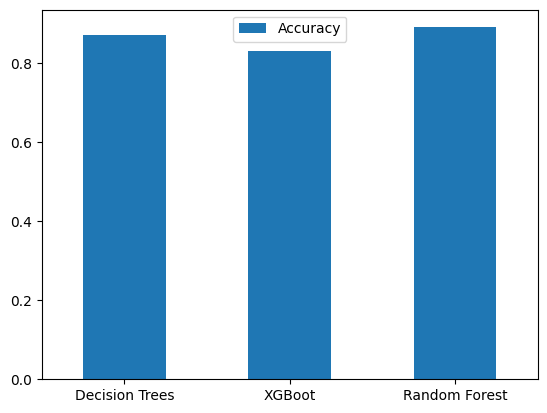

In [ ]:
cv_model_scores = {"Decision Trees": 0.87,
                 "XGBoot": 0.83,
                 "Random Forest": 0.89}

cv_model_compare = pd.DataFrame(cv_model_scores, index=["Accuracy"])

cv_model_compare.T.plot.bar()
plt.xticks(rotation = 0);

# Explainable AI Techniques

* I will need to implement local and global interpretability
* Local using SHAP: To identify features that affect loan approval
* Global using GRIP: To explain the importance of each features outcomes on the average for the entire dataset

## 1. SHAP on Random Forest Baseline Model

* Best performer, with very good accuracy, precision and fi-score

In [ ]:
explainer = shap.TreeExplainer(rdf_model)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
# Create an explainer object for the RandomForestClassifier model

# explainer = shap.Explainer(rdf_model)

# Compute SHAP values

# shap_values = explainer(X)

# Visualize the SHAP values (for example, using a bar plot)

# shap.plots.bar(shap_values)

In [ ]:
# summarize the effects of all the features

# shap.plots.beeswarm(shap_values)

In [ ]:
# visualize the first prediction's explanation

# shap.plots.waterfall(shap_values[0])